# William Jardee
## Homework 07

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Provided constants:
G     = 5  #[1/s]
ALPHA = 3  #[1/photons]
K     = 30 #[1/s]

Analyzing the equation, G has units of $\Big[\frac{1}{s}\Big]$; $N_0$ has units of "excited atoms", so is really unitless; k has units [s], and $\alpha$ has units of 
$\Big[\frac{1}{photons}\Big]$
, so is really unitless.
To double check the units work: the aim is to get photons per second
<Br>

$\Big[\Big[\frac{1}{s}\Big] - \Big[\frac{1}{s}\Big]\Big][photons] - \Big[\frac{1}{photons}\Big]\Big[\frac{1}{s}\Big][photons]^2 =\Big[\frac{photons}{s}\Big]$ 
<Br>
If you instead treat the "photons" unit as unitless then that just drops out and the equation still works

In [2]:
#Given ODE solver function

def rk2_1d(y0, t0, tf, dt, deriv_func):
    """
    Numerically solve the first order ODE deriv_func using Eulers method

    Inputs
    ----------
    y0:         Starting dependent-variable value
    t0, tf:     Starting and ending independent-variable value
    dt:         Size of the step I want to take.
    deriv_func: Function that I am trying to numerically solve.

    Outputs
    ----------
    t: Array of independent-variable values
        t = [t[0], t[1], t[2], ..., t[n_steps]]
    y: Array of corresponding dependent-variable values
        y = [y[0], y[1], y[2], ..., y[n_steps]]
    """
    t = np.arange(t0, tf+dt, dt)#Array of all the times we want
    n_steps = len(t)            #Number of steps to get to tf

    y  = np.zeros(n_steps)      #Empty array I want to put answers into
    y[0] = y0                   #Initial condition
    for n in range(n_steps-1):
        #Take a half step
        f = deriv_func(y[n],t[n])
        y_star = y[n] + 0.5 * dt * f

        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1] = (y[n] + dt*f_star)

    return t, y

In [3]:
#Since our N_0 are changing, it is best to go for a condensed lambda function following the outline that can be used by
#the ODE solver. 
def dn(N_0):
    """
    Builder: Defines a differential equation with a given N_0
    lambda function:
    input: the number of photons, n and the independent variable t
    output: the dn/dt right side given in the homework
    """
    return lambda n,t: ((G*N_0-K)*n - (ALPHA*G)*n**2)


'''
def dndt(n,t):
 return ((G*100-K)*n - (ALPHA*G)*n**2)
'''

'\ndef dndt(n,t):\n return ((G*100-K)*n - (ALPHA*G)*n**2)\n'

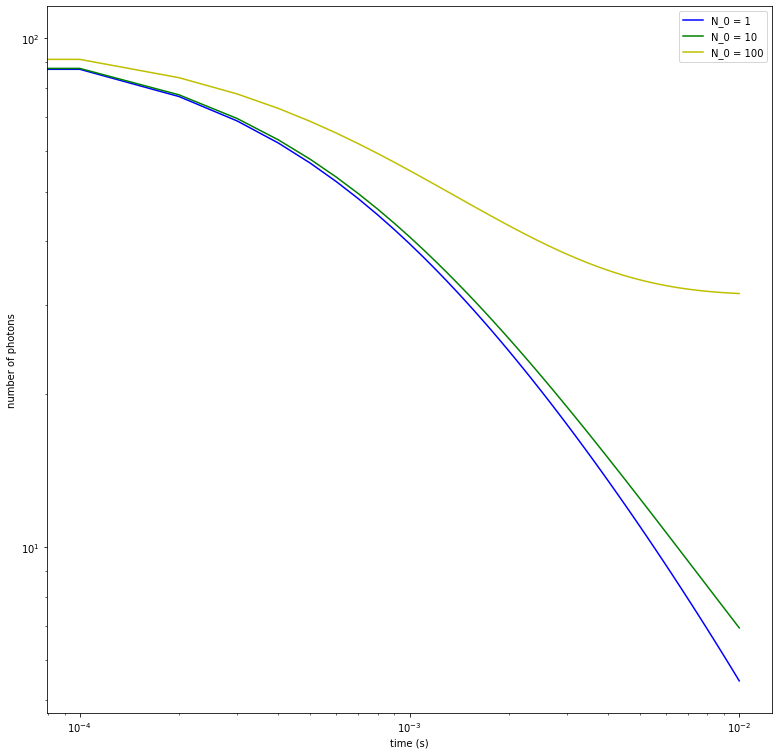

In [4]:
#Solving each of the functions
plot1 = rk2_1d(100,0,0.01,.0001,dn(1))
plot2 = rk2_1d(100,0,0.01,.0001,dn(10))
plot3 = rk2_1d(100,0,0.01,.0001,dn(100))

#Plotting
plt.figure(figsize = (13,13))
plt.plot(plot1[0], plot1[1], color = "b", label = "N_0 = 1") 
plt.plot(plot2[0], plot2[1], color = "g", label = "N_0 = 10") 
plt.plot(plot3[0], plot3[1], color = "y", label = "N_0 = 100") 

plt.xlabel("time (s)")
plt.ylabel("number of photons")

#Setting to log scale, this allows to show long-term behavior better
plt.yscale('log')
plt.xscale('log')

#Showing
plt.legend()
plt.show()

In [5]:
#Creating all three sets of data sets
#They were created in a seperate block to allow the plot to manipulated without having to recalculate this
plot1_1 = rk2_1d(0,0,0.1,.000001,dn(1))
plot1_2 = rk2_1d(10**2,0,0.1,.000001,dn(1))
plot1_3 = rk2_1d(10**4,0,0.1,.000001,dn(1))

plot2_1 = rk2_1d(0,0,0.5,.000001,dn(10))
plot2_2 = rk2_1d(10**2,0,0.5,.000001,dn(10))
plot2_3 = rk2_1d(10**4,0,0.5,.000001,dn(10))

plot3_1 = rk2_1d(0,0,0.1,.000001,dn(100))
plot3_2 = rk2_1d(10**2,0,0.1,.000001,dn(100))
plot3_3 = rk2_1d(10**4,0,0.1,.000001,dn(100))

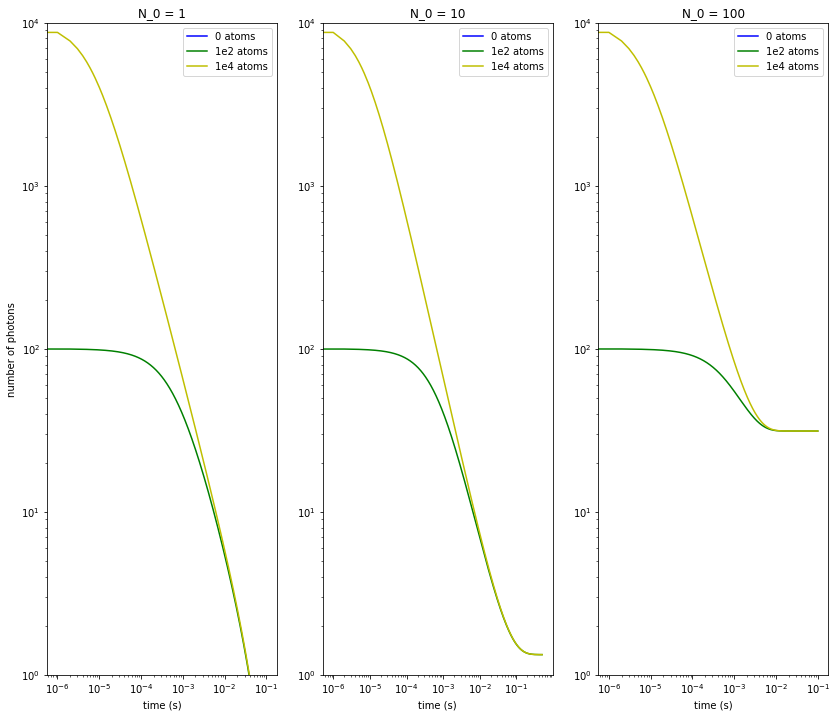

In [6]:
#Setting up grid to display all at once
gridsize = (1,3)
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

#Plotting 1
ax1.plot(plot1_1[0], plot1_1[1], color = "b", label = "0 atoms") 
ax1.plot(plot1_2[0], plot1_2[1], color = "g", label = "1e2 atoms") 
ax1.plot(plot1_3[0], plot1_3[1], color = "y", label = "1e4 atoms") 
ax1.set_title("N_0 = 1")
ax1.set_xlabel("time (s)")
ax1.set_ylabel("number of photons")
ax1.set_ylim(1, 10**4)
ax1.set_xscale('log')
ax1.set_yscale('log')

#Plotting 2
ax2.plot(plot2_1[0], plot2_1[1], color = "b", label = "0 atoms") 
ax2.plot(plot2_2[0], plot2_2[1], color = "g", label = "1e2 atoms") 
ax2.plot(plot2_3[0], plot2_3[1], color = "y", label = "1e4 atoms") 
ax2.set_title("N_0 = 10")
ax2.set_xlabel("time (s)")
ax2.set_ylim(1, 10**4)
ax2.set_xscale('log')
ax2.set_yscale('log')

#Plotting 3
ax3.plot(plot3_1[0], plot3_1[1], color = "b", label = "0 atoms") 
ax3.plot(plot3_2[0], plot3_2[1], color = "g", label = "1e2 atoms") 
ax3.plot(plot3_3[0], plot3_3[1], color = "y", label = "1e4 atoms") 
ax3.set_title("N_0 = 100")
ax3.set_xlabel("time (s)")
ax3.set_ylim(1, 10**4)
ax3.set_xscale('log')
ax3.set_yscale('log')

#showing
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

From the graphs we can deduce that there is a correlation between the $N_0$, but it would seem there is a strong dependance on the number of atoms starting photons. The Yellow lines and green lines all look very similar from the three different graphs, however their long term behavior changes.The blue line (for zero atoms) seems to have disappeared, as it should. Looking at it without log-log axis, the blue line is at y = 0. This correlates to $10^{-\infty}$ which doesn't fit on this graph. Ultimately the conclusion drawn is that there is a very large connection fbetween the starting number of photons and the resulting number of photons initially. However, as we look at the long term behavior of the plot it depends more on how well the laser works, namely $N_0$.

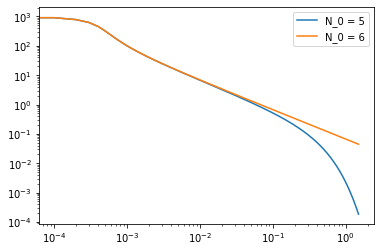

In [7]:
plot1_1 = rk2_1d(1000,0,1.5,.0001,dn(5))
plt.plot(plot1_1[0], plot1_1[1], label = "N_0 = 5")
plt.xscale('log')
plt.yscale('log')

plot1_1 = rk2_1d(1000,0,1.5,.0001,dn(6))
plt.plot(plot1_1[0], plot1_1[1], label = "N_0 = 6")
plt.xscale('log')
plt.yscale('log')

plt.legend()

Playing around with the graph and paying attention to the long term behavior, it seems that $N_0 = 6$ may be the cutoff for a laser. For a laser the number of active photons tends towards some number positive number, not zero. Looking at the original ODE, this comes form when $G \cdot N_0 = k$, or when $N_0 = 6$. And indeed, we see this in the graph if we look at first $N_0 = 5$, which tends towards $10^\infty$, or 0 vs. $N_0 = 6$ which levels out at some number less than 1. So this is a bad laser, but it does meet our cut off criteria. It seems that $N_0 = 9$ may be the moment when the number of photons is at or above 1.